In [1]:
#%matplotlib widget 
import sys
import numpy as np
import mpi4py
import os

#from pyDFCSR_2D import CSR2D
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py

#from pyDFCSR_2D.tools import plot_surface

import pickle
import os
import re
import shutil

import pmd_beamphysics as pmd

In [159]:
bmad_dir = '/global/cfs/cdirs/m669/obed/w_chicane_bmad_outputs/';
pydf_dir = '/pscratch/sd/o/ocamacho/w_chicane_pydf_outputs_csron/';

In [6]:
# Get s-coordinate info from bmad sims

In [119]:
test_file = 'bmad_csron_-17.5_-42.0.pkl';
with open(bmad_dir + test_file, 'rb') as pkl:
    data = pickle.load(pkl);
    print(data.keys())
    s = data['s'];
    eta_x = data['eta_x'];
    sigma_z = data['sigma_z'];

dict_keys(['beta_y', 'beta_x', 'etot', 'eta_y', 'eta_x', 'sigma_x', 'sigma_y', 'pc', 'cent', 'sigma61', 'sigma_z', 's', 'idx', 'P'])


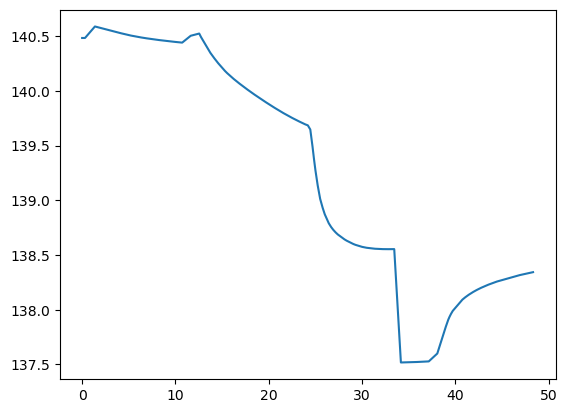

In [135]:
s0 = s[1288];
plt.plot(s[1288:-133] - s0, 1e6*sigma_z[1288:-133])

In [138]:
test_wake = 'bmadcsr_-17.0_-42.0.h5';
with h5py.File(bmad_dir + test_wake, 'r') as hf:
    print (len((hf.keys() )   ) )
    keys_sor = sorted(hf.keys(), key=lambda x: int(x.split('_')[1]))
    stdZs = np.array([np.std(hf[step]['Z'][:]) for step in keys_sor]);
    S_pos = np.array([(hf[step]['S-position'][()]) for step in keys_sor]);
    #for key in hf.keys():
    #    print(hf[key]['S-position'][()])
    #X = np.array([hf[key]['S-position'][()] for key in hf.keys() ] );
    #X = sorted(X)
    #dX = np.diff(X);
    #print(keys_sor)
    #print(dX);
    #print(hf['Step_200'].keys() )
    #data = hf['Step_'];
    #print(data['S-position'][()])
   # print(data['Z'][:])
    #print(data['CSR_Kick_m'][:])
    #plt.plot(1e6*data['Z'][:], data['Charge_m'][:] )
   # print(np.std(1e6*data['Z'][:]) , ' microns' )

692


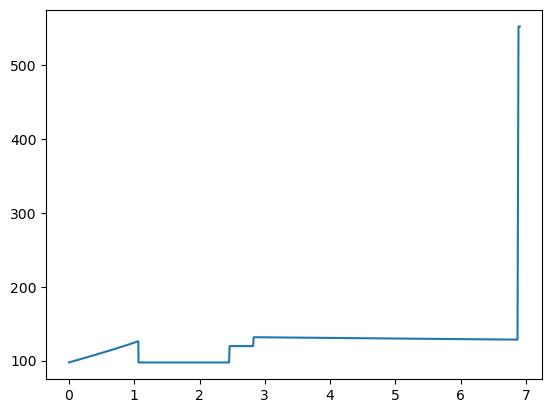

In [153]:
plt.plot(S_pos[:-1], 1e6*stdZs[:-1])

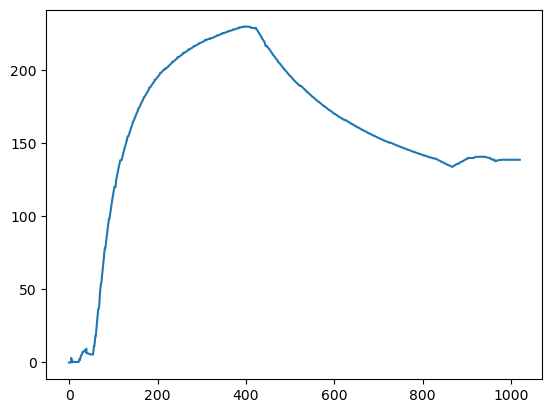

In [148]:
plt.plot(s, 1e6*sigma_z)

In [196]:
Ws_x_vars = [];
Wx_x_vars = [];
sArr = [];
for file in os.listdir(pydf_dir):
    if file.endswith('wakes.h5'):
        print(file)
        this_var_arr = [];
        with h5py.File(pydf_dir + file, 'r') as hf:
            sorted_keys = sorted(hf.keys(), key=lambda x: int(x.split('_')[1]))
            for j, key in enumerate(sorted_keys):
                if(len(sArr) <= 694):
                    sArr.append( j*0.074964 )
                Ws = (hf[key]['longitudinal']['dE_dct'] );
                Wx = (hf[key]['transverse']['xkicks']);
                #print(np.shape(Ws))
                Ws_vars = [np.var(Ws[:, i]) for i in range(32) ]
                Ws_vars /= 32
                Ws_var = np.sum([val for val in Ws_vars])
                this_var_arr.append(Ws_var)
        Ws_x_vars.append(this_var_arr)

w_chicane_-19.0_-42.0-wakes.h5
w_chicane_-19.5_-39.0-wakes.h5
w_chicane_-17.5_-40.0-wakes.h5
w_chicane_-20.5_-39.0-wakes.h5
w_chicane_-20.5_-38.0-wakes.h5
w_chicane_-21.0_-41.0-wakes.h5
w_chicane_-18.0_-38.5-wakes.h5
w_chicane_-21.0_-38.5-wakes.h5
w_chicane_-21.0_-37.5-wakes.h5
w_chicane_-18.5_-38.5-wakes.h5
w_chicane_-18.5_-37.5-wakes.h5
w_chicane_-17.0_-42.0-wakes.h5
w_chicane_-19.0_-41.5-wakes.h5
w_chicane_-20.0_-38.0-wakes.h5
w_chicane_-20.0_-42.0-wakes.h5
w_chicane_-17.5_-41.5-wakes.h5
w_chicane_-20.0_-38.5-wakes.h5
w_chicane_-17.5_-37.5-wakes.h5
w_chicane_-20.5_-41.5-wakes.h5
w_chicane_-18.0_-37.5-wakes.h5
w_chicane_-18.5_-42.0-wakes.h5
w_chicane_-19.0_-39.0-wakes.h5
w_chicane_-19.5_-37.5-wakes.h5
w_chicane_-21.0_-40.5-wakes.h5
w_chicane_-18.5_-41.5-wakes.h5
w_chicane_-19.5_-42.0-wakes.h5
w_chicane_-21.5_-40.0-wakes.h5
w_chicane_-17.0_-40.5-wakes.h5
w_chicane_-17.5_-38.5-wakes.h5
w_chicane_-18.0_-42.0-wakes.h5
w_chicane_-20.5_-38.5-wakes.h5
w_chicane_-21.0_-41.5-wakes.h5
w_chican

KeyboardInterrupt: 

In [206]:
sArr = sArr[0:-41]

In [210]:
for w in Ws_x_vars:
    if len(w) < 654:
        Ws_x_vars.remove(w)

Text(0, 0.5, ' Mean Horizontal Variance in Ws (a.u.) ')

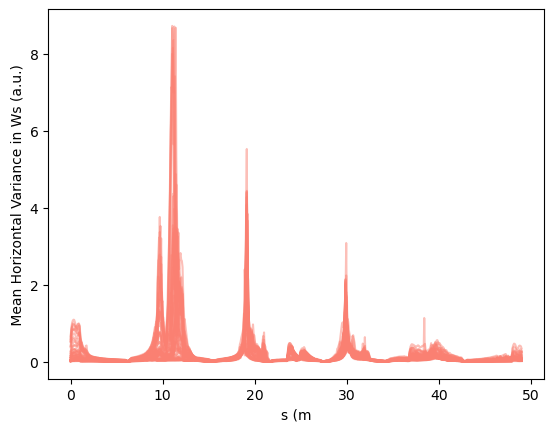

In [216]:
for entry in Ws_x_vars:
    plt.plot(sArr, np.sqrt(np.array(entry)/32), color = 'salmon', alpha = 0.50)
plt.xlabel('s (m');
plt.ylabel(' Mean Horizontal Variance in Ws (a.u.) ')